## 课程成绩呈现形式

In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os   

#%matplotlib inline
plt.rcdefaults()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize']=[6,6] #改变显示图形的大小

### 以高燕老师为例：2018-2019-1学期

In [4]:
df_jscj=pd.read_csv('data/gaoyan.csv')
df_jscj.head()

,XNM,XQM,BFZCJ,KCH,KCMC,JSGH,JSXM
0,2018,3,83.0,A0940095,Oracle数据库应用,199000177,高燕
1,2018,3,0.0,A0920014,数据库原理与应用,199000177,高燕
2,2018,3,56.0,A0920014,数据库原理与应用,199000177,高燕
3,2018,3,57.0,A0920014,数据库原理与应用,199000177,高燕
4,2018,3,57.0,A0920014,数据库原理与应用,199000177,高燕


#### 糖葫芦图：plot+条形图：bar

In [59]:
df_jscj_kc=df_jscj.groupby(['JSGH','KCMC','BFZCJ']).count()
df_jscj_kc.reset_index(inplace=True)
df_jscj_kc.head()

,JSGH,KCMC,BFZCJ,XNM,XQM,KCH,JSXM
0,199000177,Oracle数据库应用,0.0,2,2,2,2
1,199000177,Oracle数据库应用,34.0,2,2,2,2
2,199000177,Oracle数据库应用,39.0,1,1,1,1
3,199000177,Oracle数据库应用,41.0,1,1,1,1
4,199000177,Oracle数据库应用,42.0,1,1,1,1


In [60]:
point_size=120     #图像点的大小
df_jscj_kc.insert(0,'SCALE',df_jscj_kc.KCH*point_size)  #增加比例人数，只执行一次
df_jscj_kc.head()

num_course=len(df_jscj_kc.groupby('KCMC').count())   #课程数

In [61]:
fig,axs=plt.subplots(1,1)
fig.figure=[4+num_course,6]
axs.grid()

#### 糖葫芦图：plot

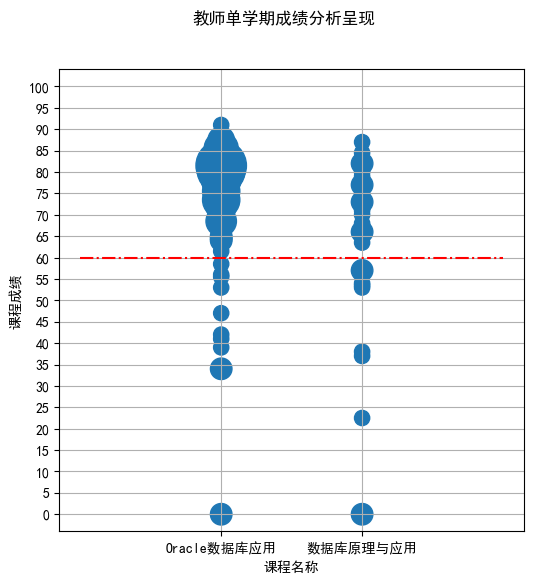

In [54]:
axs.scatter('KCMC','BFZCJ','SCALE',data=df_jscj_kc)
axs.plot([-1,num_course],[60,60],'r-.')

fig.suptitle("教师单学期成绩分析呈现")
axs.set_xlabel('课程名称')
axs.set_ylabel('课程成绩')
axs.set_yticks(np.arange(0,101,5))

plt.show()

#### 条形图：bar -》不成功

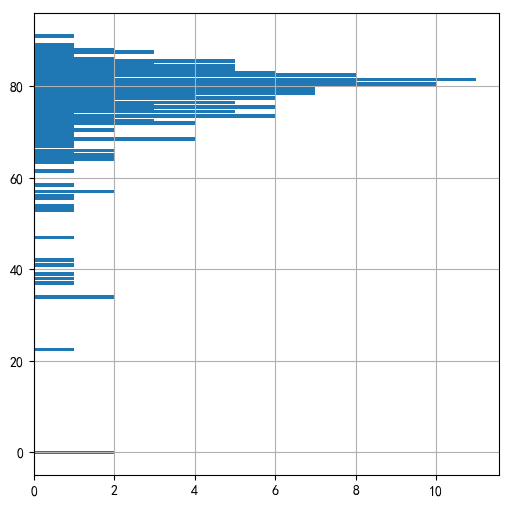

In [72]:
fig,axs=plt.subplots(1,1)
fig.figure=[4+num_course,6]
axs.grid()

#axs.bar(df_jscj_kc.BFZCJ,df_jscj_kc.KCH)
#axs.bar('BFZCJ','KCH',data=df_jscj_kc)
axs.barh('BFZCJ','KCH',data=df_jscj_kc)
plt.show()

#### 箱图：boxplot+琴箱图violinplot